# Neural network classifier demonstration

Last revised: 10-Oct-2020 by Christian Forssén [christian.forssen@chalmers.se]

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Not really needed, but nicer plots
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("talk")

## Developing a code for doing neural networks with back propagation

One can identify a set of key steps when using neural networks to solve supervised learning problems:  
  
1. Collect and pre-process data  
1. Define model and architecture  
1. Choose cost function and optimizer  
1. Train the model  
1. Evaluate model performance on test data  
1. Adjust hyperparameters (if necessary, network architecture)

The exercise "build-your-own neural network" provides a step-by-step guided recipe for coding a neural network from scratch in python.

## Introduction to tensorflow
This short introduction uses Keras to:
* Build a neural network that classifies images.
* Train this neural network.
* And, finally, evaluate the accuracy of the model.

See [https://www.tensorflow.org/tutorials/quickstart/beginner](https://www.tensorflow.org/tutorials/quickstart/beginner) for more details

See also the [Tensorflow classification tutorial](https://www.tensorflow.org/tutorials/keras/classification)

In [2]:
# Install TensorFlow by updating the conda environment

import tensorflow as tf
print('You have tensorflow version:', tf.__version__, '(must be at least 2.0.0)')

You have tensorflow version: 2.4.1 (must be at least 2.0.0)


Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. 

### Explore the data

In [4]:
# The shape of the training data
x_train.shape

(60000, 28, 28)

In [5]:
# Each training label is an integer
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

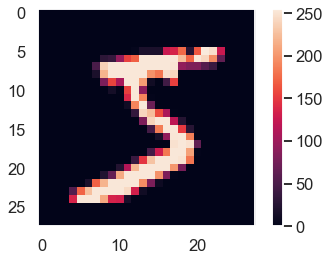

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

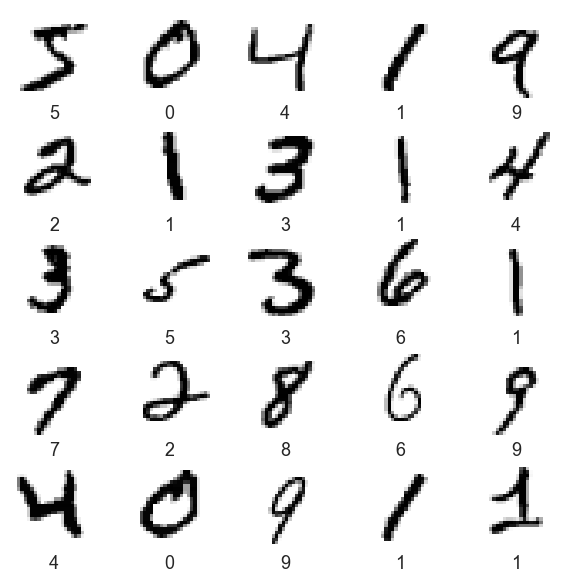

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_train[i]))


### Build the network

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), have parameters that are learned during training.

Build the [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model by stacking layers. Choose an optimizer and loss function for training:

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

The first layer in this network, [`tf.keras.layers.Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists two [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

In between the Dense layers is a [`tf.keras.layers.Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layer. Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

We can print a summary of the model that also shows the number of parameters.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Other useful commands for storing and retrieving tensorflow models are:
- For saving a `model` after training: `tf.keras.models.save_model(model, 'filename.h5')`
- For load a pre-trained model: `tf.keras.models.load_model('filename.h5')`

which uses the compact, binary `hdf5`: https://www.hdfgroup.org/solutions/hdf5/ file format.

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* *Loss function* — This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* — This is how the model is updated based on the data it sees and its loss function.
* *Metrics* — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified. 

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train and evaluate the model:

The simplest way to fit data is to just specify a number of epochs. During training the data will be fed through the network this many times.

In [12]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 16:51 - loss: 2.5199 - accuracy: 0.0312

  29/1875 [..............................] - ETA: 3s - loss: 2.0082 - accuracy: 0.3398   

  50/1875 [..............................] - ETA: 3s - loss: 1.7837 - accuracy: 0.4355

  75/1875 [>.............................] - ETA: 3s - loss: 1.5929 - accuracy: 0.5075

 109/1875 [>.............................] - ETA: 3s - loss: 1.4135 - accuracy: 0.5694

 142/1875 [=>............................] - ETA: 3s - loss: 1.2885 - accuracy: 0.6108

 177/1875 [=>............................] - ETA: 2s - loss: 1.1877 - accuracy: 0.6438

 211/1875 [==>...........................] - ETA: 2s - loss: 1.1110 - accuracy: 0.6685

 245/1875 [==>...........................] - ETA: 2s - loss: 1.0496 - accuracy: 0.6880

 279/1875 [===>..........................] - ETA: 2s - loss: 0.9991 - accuracy: 0.7039

 313/1875 [====>.........................] - ETA: 2s - loss: 0.9563 - accuracy: 0.7174

 347/1875 [====>.........................] - ETA: 2s - loss: 0.9189 - accuracy: 0.7289

 377/1875 [=====>........................] - ETA: 2s - loss: 0.8901 - accuracy: 0.7379

 412/1875 [=====>........................] - ETA: 2s - loss: 0.8602 - accuracy: 0.7471

 447/1875 [======>.......................] - ETA: 2s - loss: 0.8337 - accuracy: 0.7552

 482/1875 [======>.......................] - ETA: 2s - loss: 0.8097 - accuracy: 0.7625

 517/1875 [=======>......................] - ETA: 2s - loss: 0.7881 - accuracy: 0.7691

 551/1875 [=======>......................] - ETA: 2s - loss: 0.7689 - accuracy: 0.7749

 585/1875 [========>.....................] - ETA: 2s - loss: 0.7513 - accuracy: 0.7803

 619/1875 [========>.....................] - ETA: 1s - loss: 0.7350 - accuracy: 0.7852

 651/1875 [=========>....................] - ETA: 1s - loss: 0.7208 - accuracy: 0.7895

 685/1875 [=========>....................] - ETA: 1s - loss: 0.7068 - accuracy: 0.7937

 720/1875 [==========>...................] - ETA: 1s - loss: 0.6932 - accuracy: 0.7978

 754/1875 [===========>..................] - ETA: 1s - loss: 0.6810 - accuracy: 0.8015

 785/1875 [===========>..................] - ETA: 1s - loss: 0.6704 - accuracy: 0.8047

 820/1875 [============>.................] - ETA: 1s - loss: 0.6591 - accuracy: 0.8081

 855/1875 [============>.................] - ETA: 1s - loss: 0.6485 - accuracy: 0.8113

 889/1875 [=============>................] - ETA: 1s - loss: 0.6387 - accuracy: 0.8142

 924/1875 [=============>................] - ETA: 1s - loss: 0.6292 - accuracy: 0.8171

 958/1875 [==============>...............] - ETA: 1s - loss: 0.6204 - accuracy: 0.8197

 992/1875 [==============>...............] - ETA: 1s - loss: 0.6120 - accuracy: 0.8222

1026/1875 [===============>..............] - ETA: 1s - loss: 0.6040 - accuracy: 0.8246

1060/1875 [===============>..............] - ETA: 1s - loss: 0.5964 - accuracy: 0.8268

1095/1875 [================>.............] - ETA: 1s - loss: 0.5889 - accuracy: 0.8290

1127/1875 [=================>............] - ETA: 1s - loss: 0.5824 - accuracy: 0.8310

1161/1875 [=================>............] - ETA: 1s - loss: 0.5758 - accuracy: 0.8329

1193/1875 [==================>...........] - ETA: 1s - loss: 0.5698 - accuracy: 0.8347

1228/1875 [==================>...........] - ETA: 0s - loss: 0.5634 - accuracy: 0.8366

1262/1875 [===================>..........] - ETA: 0s - loss: 0.5575 - accuracy: 0.8383

1297/1875 [===================>..........] - ETA: 0s - loss: 0.5517 - accuracy: 0.8400

1331/1875 [====================>.........] - ETA: 0s - loss: 0.5462 - accuracy: 0.8417

1366/1875 [====================>.........] - ETA: 0s - loss: 0.5408 - accuracy: 0.8433

1401/1875 [=====================>........] - ETA: 0s - loss: 0.5355 - accuracy: 0.8448

1434/1875 [=====================>........] - ETA: 0s - loss: 0.5307 - accuracy: 0.8462

1468/1875 [======================>.......] - ETA: 0s - loss: 0.5259 - accuracy: 0.8476

1503/1875 [=======================>......] - ETA: 0s - loss: 0.5211 - accuracy: 0.8490

1537/1875 [=======================>......] - ETA: 0s - loss: 0.5166 - accuracy: 0.8503

1571/1875 [========================>.....] - ETA: 0s - loss: 0.5122 - accuracy: 0.8516

1605/1875 [========================>.....] - ETA: 0s - loss: 0.5080 - accuracy: 0.8529

1639/1875 [=========================>....] - ETA: 0s - loss: 0.5038 - accuracy: 0.8541

1672/1875 [=========================>....] - ETA: 0s - loss: 0.4999 - accuracy: 0.8552

1707/1875 [==========================>...] - ETA: 0s - loss: 0.4959 - accuracy: 0.8564

1741/1875 [==========================>...] - ETA: 0s - loss: 0.4921 - accuracy: 0.8575

1774/1875 [===========================>..] - ETA: 0s - loss: 0.4885 - accuracy: 0.8586



1809/1875 [===========================>..] - ETA: 0s - loss: 0.4848 - accuracy: 0.8596

1843/1875 [============================>.] - ETA: 0s - loss: 0.4813 - accuracy: 0.8607

1875/1875 [==============================] - 3s 2ms/step - loss: 0.4779 - accuracy: 0.8616


Epoch 2/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2368 - accuracy: 0.9062

  35/1875 [..............................] - ETA: 2s - loss: 0.1549 - accuracy: 0.9511

  69/1875 [>.............................] - ETA: 2s - loss: 0.1466 - accuracy: 0.9555

 102/1875 [>.............................] - ETA: 2s - loss: 0.1444 - accuracy: 0.9573

 137/1875 [=>............................] - ETA: 2s - loss: 0.1446 - accuracy: 0.9582

 172/1875 [=>............................] - ETA: 2s - loss: 0.1443 - accuracy: 0.9588

 207/1875 [==>...........................] - ETA: 2s - loss: 0.1442 - accuracy: 0.9591

 241/1875 [==>...........................] - ETA: 2s - loss: 0.1438 - accuracy: 0.9594

 276/1875 [===>..........................] - ETA: 2s - loss: 0.1437 - accuracy: 0.9595



 310/1875 [===>..........................] - ETA: 2s - loss: 0.1438 - accuracy: 0.9596

 344/1875 [====>.........................] - ETA: 2s - loss: 0.1441 - accuracy: 0.9595

 378/1875 [=====>........................] - ETA: 2s - loss: 0.1443 - accuracy: 0.9593

 412/1875 [=====>........................] - ETA: 2s - loss: 0.1446 - accuracy: 0.9592

 447/1875 [======>.......................] - ETA: 2s - loss: 0.1449 - accuracy: 0.9591

 482/1875 [======>.......................] - ETA: 2s - loss: 0.1452 - accuracy: 0.9589

 516/1875 [=======>......................] - ETA: 2s - loss: 0.1455 - accuracy: 0.9588

 550/1875 [=======>......................] - ETA: 1s - loss: 0.1456 - accuracy: 0.9587

 584/1875 [========>.....................] - ETA: 1s - loss: 0.1457 - accuracy: 0.9586

 618/1875 [========>.....................] - ETA: 1s - loss: 0.1457 - accuracy: 0.9585

 651/1875 [=========>....................] - ETA: 1s - loss: 0.1457 - accuracy: 0.9585

 685/1875 [=========>....................] - ETA: 1s - loss: 0.1457 - accuracy: 0.9584

 719/1875 [==========>...................] - ETA: 1s - loss: 0.1457 - accuracy: 0.9584

 753/1875 [===========>..................] - ETA: 1s - loss: 0.1457 - accuracy: 0.9583

 787/1875 [===========>..................] - ETA: 1s - loss: 0.1457 - accuracy: 0.9583

 821/1875 [============>.................] - ETA: 1s - loss: 0.1457 - accuracy: 0.9582

 855/1875 [============>.................] - ETA: 1s - loss: 0.1457 - accuracy: 0.9582

 888/1875 [=============>................] - ETA: 1s - loss: 0.1457 - accuracy: 0.9582

 923/1875 [=============>................] - ETA: 1s - loss: 0.1456 - accuracy: 0.9582

 957/1875 [==============>...............] - ETA: 1s - loss: 0.1456 - accuracy: 0.9581

 991/1875 [==============>...............] - ETA: 1s - loss: 0.1456 - accuracy: 0.9581

1025/1875 [===============>..............] - ETA: 1s - loss: 0.1456 - accuracy: 0.9581

1060/1875 [===============>..............] - ETA: 1s - loss: 0.1455 - accuracy: 0.9581

1094/1875 [================>.............] - ETA: 1s - loss: 0.1455 - accuracy: 0.9581

1128/1875 [=================>............] - ETA: 1s - loss: 0.1455 - accuracy: 0.9581

1162/1875 [=================>............] - ETA: 1s - loss: 0.1455 - accuracy: 0.9580

1195/1875 [==================>...........] - ETA: 1s - loss: 0.1454 - accuracy: 0.9580

1230/1875 [==================>...........] - ETA: 0s - loss: 0.1454 - accuracy: 0.9580

1264/1875 [===================>..........] - ETA: 0s - loss: 0.1454 - accuracy: 0.9580

1298/1875 [===================>..........] - ETA: 0s - loss: 0.1454 - accuracy: 0.9580

1332/1875 [====================>.........] - ETA: 0s - loss: 0.1453 - accuracy: 0.9580

1366/1875 [====================>.........] - ETA: 0s - loss: 0.1453 - accuracy: 0.9580

1400/1875 [=====================>........] - ETA: 0s - loss: 0.1453 - accuracy: 0.9580

1435/1875 [=====================>........] - ETA: 0s - loss: 0.1453 - accuracy: 0.9580

1468/1875 [======================>.......] - ETA: 0s - loss: 0.1452 - accuracy: 0.9580

1503/1875 [=======================>......] - ETA: 0s - loss: 0.1452 - accuracy: 0.9579

1537/1875 [=======================>......] - ETA: 0s - loss: 0.1452 - accuracy: 0.9579

1572/1875 [========================>.....] - ETA: 0s - loss: 0.1452 - accuracy: 0.9579



1605/1875 [========================>.....] - ETA: 0s - loss: 0.1452 - accuracy: 0.9579

1639/1875 [=========================>....] - ETA: 0s - loss: 0.1452 - accuracy: 0.9579

1672/1875 [=========================>....] - ETA: 0s - loss: 0.1451 - accuracy: 0.9579

1707/1875 [==========================>...] - ETA: 0s - loss: 0.1451 - accuracy: 0.9579

1741/1875 [==========================>...] - ETA: 0s - loss: 0.1450 - accuracy: 0.9579

1775/1875 [===========================>..] - ETA: 0s - loss: 0.1450 - accuracy: 0.9579

1810/1875 [===========================>..] - ETA: 0s - loss: 0.1449 - accuracy: 0.9579

1844/1875 [============================>.] - ETA: 0s - loss: 0.1448 - accuracy: 0.9579

1875/1875 [==============================] - 3s 1ms/step - loss: 0.1448 - accuracy: 0.9579


Epoch 3/10


   1/1875 [..............................] - ETA: 6s - loss: 0.0653 - accuracy: 1.0000

  35/1875 [..............................] - ETA: 2s - loss: 0.0985 - accuracy: 0.9722

  66/1875 [>.............................] - ETA: 2s - loss: 0.0953 - accuracy: 0.9723

  97/1875 [>.............................] - ETA: 2s - loss: 0.0939 - accuracy: 0.9722

 130/1875 [=>............................] - ETA: 2s - loss: 0.0942 - accuracy: 0.9718

 163/1875 [=>............................] - ETA: 2s - loss: 0.0958 - accuracy: 0.9712

 198/1875 [==>...........................] - ETA: 2s - loss: 0.0964 - accuracy: 0.9709

 233/1875 [==>...........................] - ETA: 2s - loss: 0.0971 - accuracy: 0.9708

 268/1875 [===>..........................] - ETA: 2s - loss: 0.0977 - accuracy: 0.9707

 303/1875 [===>..........................] - ETA: 2s - loss: 0.0982 - accuracy: 0.9705

 337/1875 [====>.........................] - ETA: 2s - loss: 0.0988 - accuracy: 0.9703

 372/1875 [====>.........................] - ETA: 2s - loss: 0.0992 - accuracy: 0.9701

 406/1875 [=====>........................] - ETA: 2s - loss: 0.0996 - accuracy: 0.9699

 440/1875 [======>.......................] - ETA: 2s - loss: 0.1000 - accuracy: 0.9697

 471/1875 [======>.......................] - ETA: 2s - loss: 0.1003 - accuracy: 0.9696

 504/1875 [=======>......................] - ETA: 2s - loss: 0.1007 - accuracy: 0.9694

 536/1875 [=======>......................] - ETA: 2s - loss: 0.1010 - accuracy: 0.9693

 568/1875 [========>.....................] - ETA: 1s - loss: 0.1012 - accuracy: 0.9692

 603/1875 [========>.....................]

 - ETA: 1s - loss: 0.1014 - accuracy: 0.9690

 636/1875 [=========>....................] - ETA: 1s - loss: 0.1016 - accuracy: 0.9689

 669/1875 [=========>....................] - ETA: 1s - loss: 0.1018 - accuracy: 0.9688

 704/1875 [==========>...................] - ETA: 1s - loss: 0.1020 - accuracy: 0.9688



 734/1875 [==========>...................] - ETA: 1s - loss: 0.1021 - accuracy: 0.9687

 768/1875 [===========>..................] - ETA: 1s - loss: 0.1023 - accuracy: 0.9687

 802/1875 [===========>..................] - ETA: 1s - loss: 0.1024 - accuracy: 0.9686

 837/1875 [============>.................] - ETA: 1s - loss: 0.1025 - accuracy: 0.9686

 868/1875 [============>.................] - ETA: 1s - loss: 0.1026 - accuracy: 0.9686

 903/1875 [=============>................] - ETA: 1s - loss: 0.1027 - accuracy: 0.9685

 938/1875 [==============>...............] - ETA: 1s - loss: 0.1028 - accuracy: 0.9685

 972/1875 [==============>...............] - ETA: 1s - loss: 0.1030 - accuracy: 0.9685

1005/1875 [===============>..............] - ETA: 1s - loss: 0.1031 - accuracy: 0.9684

1038/1875 [===============>..............] - ETA: 1s - loss: 0.1031 - accuracy: 0.9684

1072/1875 [================>.............] - ETA: 1s - loss: 0.1032 - accuracy: 0.9683

1107/1875 [================>.............] - ETA: 1s - loss: 0.1033 - accuracy: 0.9683

1141/1875 [=================>............] - ETA: 1s - loss: 0.1034 - accuracy: 0.9683

1176/1875 [=================>............] - ETA: 1s - loss: 0.1035 - accuracy: 0.9683

1211/1875 [==================>...........] - ETA: 1s - loss: 0.1035 - accuracy: 0.9682

1245/1875 [==================>...........] - ETA: 0s - loss: 0.1036 - accuracy: 0.9682

1278/1875 [===================>..........] - ETA: 0s - loss: 0.1036 - accuracy: 0.9682

1311/1875 [===================>..........] - ETA: 0s - loss: 0.1037 - accuracy: 0.9682

1346/1875 [====================>.........] - ETA: 0s - loss: 0.1037 - accuracy: 0.9682

1380/1875 [=====================>........] - ETA: 0s - loss: 0.1037 - accuracy: 0.9682

1414/1875 [=====================>........] - ETA: 0s - loss: 0.1038 - accuracy: 0.9681

1448/1875 [======================>.......] - ETA: 0s - loss: 0.1038 - accuracy: 0.9681

1482/1875 [======================>.......] - ETA: 0s - loss: 0.1039 - accuracy: 0.9681

1514/1875 [=======================>......] - ETA: 0s - loss: 0.1039 - accuracy: 0.9681

1548/1875 [=======================>......] - ETA: 0s - loss: 0.1039 - accuracy: 0.9681

1581/1875 [========================>.....] - ETA: 0s - loss: 0.1040 - accuracy: 0.9681

1615/1875 [========================>.....] - ETA: 0s - loss: 0.1040 - accuracy: 0.9681

1647/1875 [=========================>....] - ETA: 0s - loss: 0.1040 - accuracy: 0.9681

1681/1875 [=========================>....] - ETA: 0s - loss: 0.1040 - accuracy: 0.9681

1713/1875 [==========================>...] - ETA: 0s - loss: 0.1040 - accuracy: 0.9681

1746/1875 [==========================>...] - ETA: 0s - loss: 0.1041 - accuracy: 0.9681

1779/1875 [===========================>..] - ETA: 0s - loss: 0.1041 - accuracy: 0.9681

1812/1875 [===========================>..] - ETA: 0s - loss: 0.1041 - accuracy: 0.9681

1846/1875 [============================>.] - ETA: 0s - loss: 0.1041 - accuracy: 0.9680

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1041 - accuracy: 0.9680


Epoch 4/10


   1/1875 [..............................] - ETA: 3s - loss: 0.0375 - accuracy: 1.0000

  34/1875 [..............................] - ETA: 2s - loss: 0.0866 - accuracy: 0.9785

  66/1875 [>.............................] - ETA: 2s - loss: 0.0870 - accuracy: 0.9759

 101/1875 [>.............................] - ETA: 2s - loss: 0.0865 - accuracy: 0.9753

 134/1875 [=>............................] - ETA: 2s - loss: 0.0857 - accuracy: 0.9749

 167/1875 [=>............................] - ETA: 2s - loss: 0.0857 - accuracy: 0.9744

 200/1875 [==>...........................] - ETA: 2s - loss: 0.0860 - accuracy: 0.9740

 235/1875 [==>...........................] - ETA: 2s - loss: 0.0867 - accuracy: 0.9736

 269/1875 [===>..........................] - ETA: 2s - loss: 0.0873 - accuracy: 0.9733



 304/1875 [===>..........................] - ETA: 2s - loss: 0.0880 - accuracy: 0.9730

 336/1875 [====>.........................] - ETA: 2s - loss: 0.0885 - accuracy: 0.9728

 370/1875 [====>.........................] - ETA: 2s - loss: 0.0891 - accuracy: 0.9727

 403/1875 [=====>........................] - ETA: 2s - loss: 0.0894 - accuracy: 0.9726

 437/1875 [=====>........................] - ETA: 2s - loss: 0.0897 - accuracy: 0.9725

 471/1875 [======>.......................] - ETA: 2s - loss: 0.0898 - accuracy: 0.9725

 505/1875 [=======>......................] - ETA: 2s - loss: 0.0898 - accuracy: 0.9725

 538/1875 [=======>......................] - ETA: 2s - loss: 0.0899 - accuracy: 0.9725

 572/1875 [========>.....................] - ETA: 1s - loss: 0.0900 - accuracy: 0.9725

 605/1875 [========>.....................] - ETA: 1s - loss: 0.0901 - accuracy: 0.9725

 638/1875 [=========>....................] - ETA: 1s - loss: 0.0901 - accuracy: 0.9725

 670/1875 [=========>....................] - ETA: 1s - loss: 0.0901 - accuracy: 0.9725

 703/1875 [==========>...................] - ETA: 1s - loss: 0.0901 - accuracy: 0.9725

 737/1875 [==========>...................] - ETA: 1s - loss: 0.0901 - accuracy: 0.9725

 771/1875 [===========>..................] - ETA: 1s - loss: 0.0901 - accuracy: 0.9725

 802/1875 [===========>..................] - ETA: 1s - loss: 0.0900 - accuracy: 0.9725

 836/1875 [============>.................] - ETA: 1s - loss: 0.0899 - accuracy: 0.9725

 870/1875 [============>.................] - ETA: 1s - loss: 0.0898 - accuracy: 0.9726

 905/1875 [=============>................] - ETA: 1s - loss: 0.0898 - accuracy: 0.9726

 940/1875 [==============>...............] - ETA: 1s - loss: 0.0897 - accuracy: 0.9726

 974/1875 [==============>...............] - ETA: 1s - loss: 0.0897 - accuracy: 0.9726



1008/1875 [===============>..............] - ETA: 1s - loss: 0.0897 - accuracy: 0.9726

1042/1875 [===============>..............] - ETA: 1s - loss: 0.0897 - accuracy: 0.9726

1078/1875 [================>.............] - ETA: 1s - loss: 0.0897 - accuracy: 0.9726

1113/1875 [================>.............] - ETA: 1s - loss: 0.0896 - accuracy: 0.9726

1148/1875 [=================>............] - ETA: 1s - loss: 0.0896 - accuracy: 0.9726

1182/1875 [=================>............] - ETA: 1s - loss: 0.0896 - accuracy: 0.9726

1216/1875 [==================>...........] - ETA: 0s - loss: 0.0896 - accuracy: 0.9726

1251/1875 [===================>..........] - ETA: 0s - loss: 0.0895 - accuracy: 0.9726

1285/1875 [===================>..........] - ETA: 0s - loss: 0.0895 - accuracy: 0.9726

1318/1875 [====================>.........] - ETA: 0s - loss: 0.0894 - accuracy: 0.9727

1352/1875 [====================>.........] - ETA: 0s - loss: 0.0894 - accuracy: 0.9727

1385/1875 [=====================>........] - ETA: 0s - loss: 0.0894 - accuracy: 0.9727

1420/1875 [=====================>........] - ETA: 0s - loss: 0.0893 - accuracy: 0.9727

1454/1875 [======================>.......] - ETA: 0s - loss: 0.0893 - accuracy: 0.9727

1489/1875 [======================>.......] - ETA: 0s - loss: 0.0893 - accuracy: 0.9727

1524/1875 [=======================>......] - ETA: 0s - loss: 0.0892 - accuracy: 0.9727

1556/1875 [=======================>......] - ETA: 0s - loss: 0.0892 - accuracy: 0.9727

1586/1875 [========================>.....] - ETA: 0s - loss: 0.0892 - accuracy: 0.9727

1612/1875 [========================>.....] - ETA: 0s - loss: 0.0891 - accuracy: 0.9727

1626/1875 [=========================>....] - ETA: 0s - loss: 0.0891 - accuracy: 0.9727

1648/1875 [=========================>....] - ETA: 0s - loss: 0.0891 - accuracy: 0.9727

1673/1875 [=========================>....] - ETA: 0s - loss: 0.0891 - accuracy: 0.9727



1706/1875 [==========================>...] - ETA: 0s - loss: 0.0891 - accuracy: 0.9727

1738/1875 [==========================>...] - ETA: 0s - loss: 0.0891 - accuracy: 0.9727

1767/1875 [===========================>..] - ETA: 0s - loss: 0.0890 - accuracy: 0.9727

1801/1875 [===========================>..] - ETA: 0s - loss: 0.0890 - accuracy: 0.9727

1834/1875 [============================>.] - ETA: 0s - loss: 0.0890 - accuracy: 0.9727

1867/1875 [============================>.] - ETA: 0s - loss: 0.0890 - accuracy: 0.9727

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0890 - accuracy: 0.9727


Epoch 5/10
   1/1875 [..............................] - ETA: 3s - loss: 0.1980 - accuracy: 0.9062

  23/1875 [..............................] - ETA: 4s - loss: 0.0905 - accuracy: 0.9713

  44/1875 [..............................] - ETA: 4s - loss: 0.0815 - accuracy: 0.9751

  68/1875 [>.............................] - ETA: 4s - loss: 0.0790 - accuracy: 0.9766

  96/1875 [>.............................] - ETA: 3s - loss: 0.0782 - accuracy: 0.9768

 129/1875 [=>............................] - ETA: 3s - loss: 0.0771 - accuracy: 0.9770

 162/1875 [=>............................] - ETA: 3s - loss: 0.0767 - accuracy: 0.9770

 196/1875 [==>...........................] - ETA: 3s - loss: 0.0764 - accuracy: 0.9771

 232/1875 [==>...........................] - ETA: 2s - loss: 0.0759 - accuracy: 0.9771

 266/1875 [===>..........................] - ETA: 2s - loss: 0.0756 - accuracy: 0.9772

 299/1875 [===>..........................] - ETA: 2s - loss: 0.0754 - accuracy: 0.9773

 332/1875 [====>.........................] - ETA: 2s - loss: 0.0753 - accuracy: 0.9774

 361/1875 [====>.........................] - ETA: 2s - loss: 0.0752 - accuracy: 0.9774

 383/1875 [=====>........................] - ETA: 2s - loss: 0.0752 - accuracy: 0.9775

 407/1875 [=====>........................] - ETA: 2s - loss: 0.0751 - accuracy: 0.9775

 424/1875 [=====>........................] - ETA: 2s - loss: 0.0750 - accuracy: 0.9775

 455/1875 [======>.......................] - ETA: 2s - loss: 0.0748 - accuracy: 0.9776

 482/1875 [======>.......................] - ETA: 2s - loss: 0.0747 - accuracy: 0.9776

 511/1875 [=======>......................] - ETA: 2s - loss: 0.0745 - accuracy: 0.9777

 542/1875 [=======>......................] - ETA: 2s - loss: 0.0743 - accuracy: 0.9777

 573/1875 [========>.....................] - ETA: 2s - loss: 0.0741 - accuracy: 0.9778

 607/1875 [========>.....................] - ETA: 2s - loss: 0.0738 - accuracy: 0.9778

 640/1875 [=========>....................] - ETA: 2s - loss: 0.0737 - accuracy: 0.9779

 675/1875 [=========>....................] - ETA: 2s - loss: 0.0736 - accuracy: 0.9779

 705/1875 [==========>...................] - ETA: 2s - loss: 0.0735 - accuracy: 0.9779

 737/1875 [==========>...................] - ETA: 1s - loss: 0.0735 - accuracy: 0.9779

 765/1875 [===========>..................] - ETA: 1s - loss: 0.0735 - accuracy: 0.9779

 796/1875 [===========>..................] - ETA: 1s - loss: 0.0735 - accuracy: 0.9779

 825/1875 [============>.................] - ETA: 1s - loss: 0.0734 - accuracy: 0.9779

 859/1875 [============>.................] - ETA: 1s - loss: 0.0734 - accuracy: 0.9779

 890/1875 [=============>................] - ETA: 1s - loss: 0.0734 - accuracy: 0.9779

 924/1875 [=============>................] - ETA: 1s - loss: 0.0734 - accuracy: 0.9779

 957/1875 [==============>...............] - ETA: 1s - loss: 0.0733 - accuracy: 0.9779

 991/1875 [==============>...............] - ETA: 1s - loss: 0.0733 - accuracy: 0.9779

1025/1875 [===============>..............] - ETA: 1s - loss: 0.0732 - accuracy: 0.9779

1059/1875 [===============>..............] - ETA: 1s - loss: 0.0732 - accuracy: 0.9779

1092/1875 [================>.............] - ETA: 1s - loss: 0.0732 - accuracy: 0.9779

1127/1875 [=================>............] - ETA: 1s - loss: 0.0732 - accuracy: 0.9779

1160/1875 [=================>............] - ETA: 1s - loss: 0.0732 - accuracy: 0.9779

1195/1875 [==================>...........] - ETA: 1s - loss: 0.0731 - accuracy: 0.9779

1228/1875 [==================>...........] - ETA: 1s - loss: 0.0731 - accuracy: 0.9780

1262/1875 [===================>..........] - ETA: 1s - loss: 0.0731 - accuracy: 0.9780

1296/1875 [===================>..........] - ETA: 0s - loss: 0.0731 - accuracy: 0.9780

1328/1875 [====================>.........] - ETA: 0s - loss: 0.0730 - accuracy: 0.9780

1362/1875 [====================>.........] - ETA: 0s - loss: 0.0730 - accuracy: 0.9780

1395/1875 [=====================>........] - ETA: 0s - loss: 0.0730 - accuracy: 0.9780

1428/1875 [=====================>........] - ETA: 0s - loss: 0.0730 - accuracy: 0.9780

1462/1875 [======================>.......] - ETA: 0s - loss: 0.0730 - accuracy: 0.9780

1497/1875 [======================>.......] - ETA: 0s - loss: 0.0730 - accuracy: 0.9780

1530/1875 [=======================>......] - ETA: 0s - loss: 0.0730 - accuracy: 0.9780

1559/1875 [=======================>......] - ETA: 0s - loss: 0.0730 - accuracy: 0.9779



1586/1875 [========================>.....] - ETA: 0s - loss: 0.0730 - accuracy: 0.9779

1614/1875 [========================>.....] - ETA: 0s - loss: 0.0730 - accuracy: 0.9779

1646/1875 [=========================>....] - ETA: 0s - loss: 0.0731 - accuracy: 0.9779

1678/1875 [=========================>....] - ETA: 0s - loss: 0.0731 - accuracy: 0.9779

1709/1875 [==========================>...] - ETA: 0s - loss: 0.0731 - accuracy: 0.9779

1744/1875 [==========================>...] - ETA: 0s - loss: 0.0731 - accuracy: 0.9779

1776/1875 [===========================>..] - ETA: 0s - loss: 0.0731 - accuracy: 0.9779

1809/1875 [===========================>..] - ETA: 0s - loss: 0.0732 - accuracy: 0.9778

1843/1875 [============================>.] - ETA: 0s - loss: 0.0732 - accuracy: 0.9778

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0732 - accuracy: 0.9778


Epoch 6/10
   1/1875 [..............................] - ETA: 3s - loss: 0.0538 - accuracy: 0.9688

  30/1875 [..............................] - ETA: 3s - loss: 0.0540 - accuracy: 0.9833

  55/1875 [..............................] - ETA: 3s - loss: 0.0583 - accuracy: 0.9816

  85/1875 [>.............................] - ETA: 3s - loss: 0.0588 - accuracy: 0.9812

 117/1875 [>.............................] - ETA: 3s - loss: 0.0599 - accuracy: 0.9807

 149/1875 [=>............................] - ETA: 2s - loss: 0.0605 - accuracy: 0.9805

 180/1875 [=>............................] - ETA: 2s - loss: 0.0608 - accuracy: 0.9805

 212/1875 [==>...........................] - ETA: 2s - loss: 0.0609 - accuracy: 0.9806

 244/1875 [==>...........................] - ETA: 2s - loss: 0.0611 - accuracy: 0.9806

 278/1875 [===>..........................] - ETA: 2s - loss: 0.0612 - accuracy: 0.9806

 310/1875 [===>..........................] - ETA: 2s - loss: 0.0615 - accuracy: 0.9805

 343/1875 [====>.........................] - ETA: 2s - loss: 0.0617 - accuracy: 0.9805

 375/1875 [=====>........................] - ETA: 2s - loss: 0.0619 - accuracy: 0.9804

 409/1875 [=====>........................] - ETA: 2s - loss: 0.0619 - accuracy: 0.9804

 443/1875 [======>.......................] - ETA: 2s - loss: 0.0619 - accuracy: 0.9804

 478/1875 [======>.......................] - ETA: 2s - loss: 0.0618 - accuracy: 0.9804

 513/1875 [=======>......................] - ETA: 2s - loss: 0.0618 - accuracy: 0.9804

 548/1875 [=======>......................] - ETA: 2s - loss: 0.0618 - accuracy: 0.9804

 581/1875 [========>.....................] - ETA: 2s - loss: 0.0618 - accuracy: 0.9804

 614/1875 [========>.....................] - ETA: 1s - loss: 0.0618 - accuracy: 0.9804

 647/1875 [=========>....................] - ETA: 1s - loss: 0.0618 - accuracy: 0.9803

 680/1875 [=========>....................] - ETA: 1s - loss: 0.0618 - accuracy: 0.9803

 713/1875 [==========>...................] - ETA: 1s - loss: 0.0618 - accuracy: 0.9803

 747/1875 [==========>...................] - ETA: 1s - loss: 0.0618 - accuracy: 0.9802

 780/1875 [===========>..................] - ETA: 1s - loss: 0.0618 - accuracy: 0.9802

 814/1875 [============>.................] - ETA: 1s - loss: 0.0619 - accuracy: 0.9802

 847/1875 [============>.................] - ETA: 1s - loss: 0.0619 - accuracy: 0.9802



 881/1875 [=============>................] - ETA: 1s - loss: 0.0619 - accuracy: 0.9802

 913/1875 [=============>................] - ETA: 1s - loss: 0.0620 - accuracy: 0.9801

 946/1875 [==============>...............] - ETA: 1s - loss: 0.0620 - accuracy: 0.9801

 980/1875 [==============>...............] - ETA: 1s - loss: 0.0620 - accuracy: 0.9801

1015/1875 [===============>..............] - ETA: 1s - loss: 0.0621 - accuracy: 0.9801

1048/1875 [===============>..............] - ETA: 1s - loss: 0.0621 - accuracy: 0.9801

1082/1875 [================>.............] - ETA: 1s - loss: 0.0621 - accuracy: 0.9801

1113/1875 [================>.............] - ETA: 1s - loss: 0.0621 - accuracy: 0.9800

1145/1875 [=================>............] - ETA: 1s - loss: 0.0621 - accuracy: 0.9800

1177/1875 [=================>............] - ETA: 1s - loss: 0.0621 - accuracy: 0.9800

1211/1875 [==================>...........] - ETA: 1s - loss: 0.0621 - accuracy: 0.9800

1244/1875 [==================>...........] - ETA: 0s - loss: 0.0622 - accuracy: 0.9800

1277/1875 [===================>..........] - ETA: 0s - loss: 0.0622 - accuracy: 0.9800

1310/1875 [===================>..........] - ETA: 0s - loss: 0.0622 - accuracy: 0.9800

1344/1875 [====================>.........] - ETA: 0s - loss: 0.0623 - accuracy: 0.9800

1379/1875 [=====================>........] - ETA: 0s - loss: 0.0623 - accuracy: 0.9799

1412/1875 [=====================>........] - ETA: 0s - loss: 0.0624 - accuracy: 0.9799

1445/1875 [======================>.......] - ETA: 0s - loss: 0.0624 - accuracy: 0.9799

1477/1875 [======================>.......] - ETA: 0s - loss: 0.0624 - accuracy: 0.9799

1509/1875 [=======================>......] - ETA: 0s - loss: 0.0625 - accuracy: 0.9799

1543/1875 [=======================>......] - ETA: 0s - loss: 0.0625 - accuracy: 0.9799

1577/1875 [========================>.....] - ETA: 0s - loss: 0.0626 - accuracy: 0.9798

1611/1875 [========================>.....] - ETA: 0s - loss: 0.0626 - accuracy: 0.9798

1642/1875 [=========================>....] - ETA: 0s - loss: 0.0627 - accuracy: 0.9798

1677/1875 [=========================>....] - ETA: 0s - loss: 0.0627 - accuracy: 0.9798

1711/1875 [==========================>...] - ETA: 0s - loss: 0.0628 - accuracy: 0.9798

1740/1875 [==========================>...] - ETA: 0s - loss: 0.0628 - accuracy: 0.9797

1772/1875 [===========================>..] - ETA: 0s - loss: 0.0629 - accuracy: 0.9797

1806/1875 [===========================>..] - ETA: 0s - loss: 0.0629 - accuracy: 0.9797

1839/1875 [============================>.] - ETA: 0s - loss: 0.0629 - accuracy: 0.9797

1868/1875 [============================>.] - ETA: 0s - loss: 0.0630 - accuracy: 0.9797

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0630 - accuracy: 0.9797


Epoch 7/10
   1/1875 [..............................] - ETA: 6s - loss: 0.0515 - accuracy: 0.9688

  34/1875 [..............................] - ETA: 2s - loss: 0.0579 - accuracy: 0.9829

  66/1875 [>.............................] - ETA: 2s - loss: 0.0577 - accuracy: 0.9828

  99/1875 [>.............................] - ETA: 2s - loss: 0.0577 - accuracy: 0.9826

 133/1875 [=>............................] - ETA: 2s - loss: 0.0569 - accuracy: 0.9826

 167/1875 [=>............................] - ETA: 2s - loss: 0.0560 - accuracy: 0.9827

 199/1875 [==>...........................] - ETA: 2s - loss: 0.0556 - accuracy: 0.9827

 231/1875 [==>...........................] - ETA: 2s - loss: 0.0554 - accuracy: 0.9826

 264/1875 [===>..........................] - ETA: 2s - loss: 0.0554 - accuracy: 0.9826

 298/1875 [===>..........................] - ETA: 2s - loss: 0.0554 - accuracy: 0.9825

 332/1875 [====>.........................] - ETA: 2s - loss: 0.0554 - accuracy: 0.9825

 360/1875 [====>.........................] - ETA: 2s - loss: 0.0554 - accuracy: 0.9825



 389/1875 [=====>........................] - ETA: 2s - loss: 0.0554 - accuracy: 0.9825

 420/1875 [=====>........................] - ETA: 2s - loss: 0.0554 - accuracy: 0.9825

 453/1875 [======>.......................] - ETA: 2s - loss: 0.0555 - accuracy: 0.9825

 477/1875 [======>.......................] - ETA: 2s - loss: 0.0554 - accuracy: 0.9825

 501/1875 [=======>......................] - ETA: 2s - loss: 0.0554 - accuracy: 0.9825

 533/1875 [=======>......................] - ETA: 2s - loss: 0.0553 - accuracy: 0.9826

 567/1875 [========>.....................] - ETA: 2s - loss: 0.0553 - accuracy: 0.9826

 595/1875 [========>.....................] - ETA: 2s - loss: 0.0552 - accuracy: 0.9826

 624/1875 [========>.....................] - ETA: 2s - loss: 0.0552 - accuracy: 0.9826

 651/1875 [=========>....................] - ETA: 2s - loss: 0.0552 - accuracy: 0.9826

 684/1875 [=========>....................] - ETA: 1s - loss: 0.0551 - accuracy: 0.9826

 720/1875 [==========>...................] - ETA: 1s - loss: 0.0551 - accuracy: 0.9826

 753/1875 [===========>..................] - ETA: 1s - loss: 0.0551 - accuracy: 0.9826

 779/1875 [===========>..................] - ETA: 1s - loss: 0.0550 - accuracy: 0.9826

 808/1875 [===========>..................] - ETA: 1s - loss: 0.0550 - accuracy: 0.9826

 834/1875 [============>.................] - ETA: 1s - loss: 0.0550 - accuracy: 0.9826

 866/1875 [============>.................] - ETA: 1s - loss: 0.0550 - accuracy: 0.9826

 897/1875 [=============>................] - ETA: 1s - loss: 0.0550 - accuracy: 0.9826

 931/1875 [=============>................] - ETA: 1s - loss: 0.0549 - accuracy: 0.9826

 956/1875 [==============>...............] - ETA: 1s - loss: 0.0549 - accuracy: 0.9826

 982/1875 [==============>...............] - ETA: 1s - loss: 0.0549 - accuracy: 0.9826

1003/1875 [===============>..............] - ETA: 1s - loss: 0.0549 - accuracy: 0.9826

1030/1875 [===============>..............] - ETA: 1s - loss: 0.0549 - accuracy: 0.9826

1059/1875 [===============>..............] - ETA: 1s - loss: 0.0549 - accuracy: 0.9826

1085/1875 [================>.............] - ETA: 1s - loss: 0.0549 - accuracy: 0.9826

1108/1875 [================>.............] - ETA: 1s - loss: 0.0549 - accuracy: 0.9826

1141/1875 [=================>............] - ETA: 1s - loss: 0.0549 - accuracy: 0.9826

1158/1875 [=================>............] - ETA: 1s - loss: 0.0549 - accuracy: 0.9826

1175/1875 [=================>............] - ETA: 1s - loss: 0.0550 - accuracy: 0.9826

1202/1875 [==================>...........] - ETA: 1s - loss: 0.0550 - accuracy: 0.9826

1232/1875 [==================>...........] - ETA: 1s - loss: 0.0550 - accuracy: 0.9826

1251/1875 [===================>..........] - ETA: 1s - loss: 0.0550 - accuracy: 0.9826

1270/1875 [===================>..........] - ETA: 1s - loss: 0.0550 - accuracy: 0.9826

1290/1875 [===================>..........] - ETA: 1s - loss: 0.0550 - accuracy: 0.9826

1317/1875 [====================>.........] - ETA: 0s - loss: 0.0550 - accuracy: 0.9826

1350/1875 [====================>.........] - ETA: 0s - loss: 0.0550 - accuracy: 0.9826

1384/1875 [=====================>........] - ETA: 0s - loss: 0.0550 - accuracy: 0.9826



1415/1875 [=====================>........] - ETA: 0s - loss: 0.0551 - accuracy: 0.9826

1443/1875 [======================>.......] - ETA: 0s - loss: 0.0551 - accuracy: 0.9826

1477/1875 [======================>.......] - ETA: 0s - loss: 0.0551 - accuracy: 0.9826

1507/1875 [=======================>......] - ETA: 0s - loss: 0.0551 - accuracy: 0.9826

1528/1875 [=======================>......] - ETA: 0s - loss: 0.0551 - accuracy: 0.9826

1547/1875 [=======================>......] - ETA: 0s - loss: 0.0552 - accuracy: 0.9826

1570/1875 [========================>.....] - ETA: 0s - loss: 0.0552 - accuracy: 0.9826

1602/1875 [========================>.....] - ETA: 0s - loss: 0.0552 - accuracy: 0.9826

1635/1875 [=========================>....] - ETA: 0s - loss: 0.0552 - accuracy: 0.9826

1659/1875 [=========================>....] - ETA: 0s - loss: 0.0552 - accuracy: 0.9826

1681/1875 [=========================>....] - ETA: 0s - loss: 0.0552 - accuracy: 0.9826

1710/1875 [==========================>...] - ETA: 0s - loss: 0.0552 - accuracy: 0.9826

1742/1875 [==========================>...] - ETA: 0s - loss: 0.0553 - accuracy: 0.9825

1774/1875 [===========================>..] - ETA: 0s - loss: 0.0553 - accuracy: 0.9825

1807/1875 [===========================>..] - ETA: 0s - loss: 0.0553 - accuracy: 0.9825

1833/1875 [============================>.] - ETA: 0s - loss: 0.0553 - accuracy: 0.9825

1860/1875 [============================>.] - ETA: 0s - loss: 0.0553 - accuracy: 0.9825

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0553 - accuracy: 0.9825


Epoch 8/10
   1/1875 [..............................] - ETA: 4s - loss: 0.0427 - accuracy: 1.0000

  32/1875 [..............................] - ETA: 3s - loss: 0.0463 - accuracy: 0.9865

  60/1875 [..............................] - ETA: 3s - loss: 0.0554 - accuracy: 0.9832

  84/1875 [>.............................] - ETA: 3s - loss: 0.0594 - accuracy: 0.9818

 102/1875 [>.............................] - ETA: 3s - loss: 0.0602 - accuracy: 0.9815



 120/1875 [>.............................] - ETA: 3s - loss: 0.0604 - accuracy: 0.9812

 133/1875 [=>............................] - ETA: 4s - loss: 0.0603 - accuracy: 0.9812

 157/1875 [=>............................] - ETA: 3s - loss: 0.0602 - accuracy: 0.9811

 187/1875 [=>............................] - ETA: 3s - loss: 0.0599 - accuracy: 0.9811

 217/1875 [==>...........................] - ETA: 3s - loss: 0.0594 - accuracy: 0.9811

 244/1875 [==>...........................] - ETA: 3s - loss: 0.0591 - accuracy: 0.9812

 268/1875 [===>..........................] - ETA: 3s - loss: 0.0588 - accuracy: 0.9813

 289/1875 [===>..........................] - ETA: 3s - loss: 0.0586 - accuracy: 0.9814

 318/1875 [====>.........................] - ETA: 3s - loss: 0.0584 - accuracy: 0.9815

 345/1875 [====>.........................] - ETA: 3s - loss: 0.0582 - accuracy: 0.9816

 374/1875 [====>.........................] - ETA: 3s - loss: 0.0579 - accuracy: 0.9817

 405/1875 [=====>........................] - ETA: 2s - loss: 0.0576 - accuracy: 0.9818

 433/1875 [=====>........................] - ETA: 2s - loss: 0.0574 - accuracy: 0.9819

 458/1875 [======>.......................] - ETA: 2s - loss: 0.0571 - accuracy: 0.9819

 485/1875 [======>.......................] - ETA: 2s - loss: 0.0569 - accuracy: 0.9820

 513/1875 [=======>......................] - ETA: 2s - loss: 0.0568 - accuracy: 0.9820

 541/1875 [=======>......................] - ETA: 2s - loss: 0.0566 - accuracy: 0.9820

 568/1875 [========>.....................] - ETA: 2s - loss: 0.0564 - accuracy: 0.9820

 594/1875 [========>.....................] - ETA: 2s - loss: 0.0563 - accuracy: 0.9821

 621/1875 [========>.....................] - ETA: 2s - loss: 0.0562 - accuracy: 0.9821

 654/1875 [=========>....................] - ETA: 2s - loss: 0.0561 - accuracy: 0.9821

 685/1875 [=========>....................] - ETA: 2s - loss: 0.0560 - accuracy: 0.9821

 717/1875 [==========>...................] - ETA: 2s - loss: 0.0558 - accuracy: 0.9822

 747/1875 [==========>...................] - ETA: 2s - loss: 0.0557 - accuracy: 0.9822

 774/1875 [===========>..................] - ETA: 2s - loss: 0.0555 - accuracy: 0.9822

 806/1875 [===========>..................] - ETA: 2s - loss: 0.0554 - accuracy: 0.9823

 838/1875 [============>.................] - ETA: 1s - loss: 0.0553 - accuracy: 0.9823

 872/1875 [============>.................] - ETA: 1s - loss: 0.0551 - accuracy: 0.9823

 905/1875 [=============>................] - ETA: 1s - loss: 0.0549 - accuracy: 0.9824

 938/1875 [==============>...............] - ETA: 1s - loss: 0.0548 - accuracy: 0.9824

 972/1875 [==============>...............] - ETA: 1s - loss: 0.0547 - accuracy: 0.9824

1005/1875 [===============>..............] - ETA: 1s - loss: 0.0546 - accuracy: 0.9824

1038/1875 [===============>..............] - ETA: 1s - loss: 0.0544 - accuracy: 0.9825

1071/1875 [================>.............] - ETA: 1s - loss: 0.0543 - accuracy: 0.9825

1104/1875 [================>.............] - ETA: 1s - loss: 0.0542 - accuracy: 0.9825

1137/1875 [=================>............] - ETA: 1s - loss: 0.0541 - accuracy: 0.9825

1171/1875 [=================>............] - ETA: 1s - loss: 0.0541 - accuracy: 0.9825

1205/1875 [==================>...........] - ETA: 1s - loss: 0.0540 - accuracy: 0.9826

1239/1875 [==================>...........] - ETA: 1s - loss: 0.0539 - accuracy: 0.9826

1273/1875 [===================>..........] - ETA: 1s - loss: 0.0539 - accuracy: 0.9826

1306/1875 [===================>..........] - ETA: 0s - loss: 0.0538 - accuracy: 0.9826

1340/1875 [====================>.........] - ETA: 0s - loss: 0.0538 - accuracy: 0.9826

1372/1875 [====================>.........] - ETA: 0s - loss: 0.0538 - accuracy: 0.9826

1405/1875 [=====================>........] - ETA: 0s - loss: 0.0538 - accuracy: 0.9826

1438/1875 [======================>.......] - ETA: 0s - loss: 0.0537 - accuracy: 0.9826

1472/1875 [======================>.......] - ETA: 0s - loss: 0.0537 - accuracy: 0.9826

1505/1875 [=======================>......] - ETA: 0s - loss: 0.0537 - accuracy: 0.9826

1539/1875 [=======================>......] - ETA: 0s - loss: 0.0537 - accuracy: 0.9826

1567/1875 [========================>.....] - ETA: 0s - loss: 0.0537 - accuracy: 0.9826

1594/1875 [========================>.....] - ETA: 0s - loss: 0.0537 - accuracy: 0.9826

1623/1875 [========================>.....] - ETA: 0s - loss: 0.0536 - accuracy: 0.9826

1655/1875 [=========================>....] - ETA: 0s - loss: 0.0536 - accuracy: 0.9826

1689/1875 [==========================>...] - ETA: 0s - loss: 0.0536 - accuracy: 0.9826

1722/1875 [==========================>...] - ETA: 0s - loss: 0.0536 - accuracy: 0.9826

1754/1875 [===========================>..] - ETA: 0s - loss: 0.0536 - accuracy: 0.9827

1788/1875 [===========================>..] - ETA: 0s - loss: 0.0535 - accuracy: 0.9827

1823/1875 [============================>.] - ETA: 0s - loss: 0.0535 - accuracy: 0.9827

1857/1875 [============================>.] - ETA: 0s - loss: 0.0535 - accuracy: 0.9827

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0535 - accuracy: 0.9827


Epoch 9/10
   1/1875 [..............................] - ETA: 4s - loss: 0.0052 - accuracy: 1.0000

  33/1875 [..............................] - ETA: 2s - loss: 0.0310 - accuracy: 0.9922

  66/1875 [>.............................] - ETA: 2s - loss: 0.0338 - accuracy: 0.9905

 100/1875 [>.............................] - ETA: 2s - loss: 0.0342 - accuracy: 0.9894

 126/1875 [=>............................] - ETA: 2s - loss: 0.0346 - accuracy: 0.9891

 145/1875 [=>............................] - ETA: 3s - loss: 0.0349 - accuracy: 0.9889

 173/1875 [=>............................] - ETA: 3s - loss: 0.0353 - accuracy: 0.9887

 207/1875 [==>...........................] - ETA: 2s - loss: 0.0357 - accuracy: 0.9885

 241/1875 [==>...........................] - ETA: 2s - loss: 0.0360 - accuracy: 0.9883

 275/1875 [===>..........................] - ETA: 2s - loss: 0.0363 - accuracy: 0.9882

 306/1875 [===>..........................] - ETA: 2s - loss: 0.0366 - accuracy: 0.9880



 337/1875 [====>.........................] - ETA: 2s - loss: 0.0372 - accuracy: 0.9877

 365/1875 [====>.........................] - ETA: 2s - loss: 0.0375 - accuracy: 0.9875

 392/1875 [=====>........................] - ETA: 2s - loss: 0.0378 - accuracy: 0.9874

 419/1875 [=====>........................] - ETA: 2s - loss: 0.0380 - accuracy: 0.9873

 451/1875 [======>.......................] - ETA: 2s - loss: 0.0383 - accuracy: 0.9871

 484/1875 [======>.......................] - ETA: 2s - loss: 0.0385 - accuracy: 0.9870

 518/1875 [=======>......................] - ETA: 2s - loss: 0.0386 - accuracy: 0.9870

 551/1875 [=======>......................] - ETA: 2s - loss: 0.0388 - accuracy: 0.9869

 585/1875 [========>.....................] - ETA: 2s - loss: 0.0390 - accuracy: 0.9868

 619/1875 [========>.....................] - ETA: 2s - loss: 0.0391 - accuracy: 0.9868

 652/1875 [=========>....................] - ETA: 2s - loss: 0.0393 - accuracy: 0.9867

 683/1875 [=========>....................] - ETA: 1s - loss: 0.0395 - accuracy: 0.9867

 717/1875 [==========>...................] - ETA: 1s - loss: 0.0397 - accuracy: 0.9866

 748/1875 [==========>...................] - ETA: 1s - loss: 0.0399 - accuracy: 0.9865

 780/1875 [===========>..................] - ETA: 1s - loss: 0.0401 - accuracy: 0.9864

 812/1875 [===========>..................] - ETA: 1s - loss: 0.0403 - accuracy: 0.9864

 845/1875 [============>.................] - ETA: 1s - loss: 0.0405 - accuracy: 0.9863

 878/1875 [=============>................] - ETA: 1s - loss: 0.0408 - accuracy: 0.9862

 910/1875 [=============>................] - ETA: 1s - loss: 0.0410 - accuracy: 0.9861

 943/1875 [==============>...............] - ETA: 1s - loss: 0.0412 - accuracy: 0.9860

 977/1875 [==============>...............] - ETA: 1s - loss: 0.0414 - accuracy: 0.9860

1011/1875 [===============>..............] - ETA: 1s - loss: 0.0416 - accuracy: 0.9859

1044/1875 [===============>..............] - ETA: 1s - loss: 0.0417 - accuracy: 0.9859

1075/1875 [================>.............] - ETA: 1s - loss: 0.0419 - accuracy: 0.9858

1108/1875 [================>.............] - ETA: 1s - loss: 0.0420 - accuracy: 0.9858

1142/1875 [=================>............] - ETA: 1s - loss: 0.0421 - accuracy: 0.9857

1175/1875 [=================>............] - ETA: 1s - loss: 0.0423 - accuracy: 0.9857

1209/1875 [==================>...........] - ETA: 1s - loss: 0.0424 - accuracy: 0.9856

1242/1875 [==================>...........] - ETA: 1s - loss: 0.0425 - accuracy: 0.9856

1275/1875 [===================>..........] - ETA: 0s - loss: 0.0426 - accuracy: 0.9856

1308/1875 [===================>..........] - ETA: 0s - loss: 0.0427 - accuracy: 0.9856

1340/1875 [====================>.........] - ETA: 0s - loss: 0.0428 - accuracy: 0.9855

1372/1875 [====================>.........] - ETA: 0s - loss: 0.0429 - accuracy: 0.9855

1405/1875 [=====================>........] - ETA: 0s - loss: 0.0429 - accuracy: 0.9855

1434/1875 [=====================>........] - ETA: 0s - loss: 0.0430 - accuracy: 0.9855

1467/1875 [======================>.......] - ETA: 0s - loss: 0.0431 - accuracy: 0.9854

1499/1875 [======================>.......] - ETA: 0s - loss: 0.0432 - accuracy: 0.9854

1531/1875 [=======================>......] - ETA: 0s - loss: 0.0433 - accuracy: 0.9854

1564/1875 [========================>.....] - ETA: 0s - loss: 0.0433 - accuracy: 0.9854

1597/1875 [========================>.....] - ETA: 0s - loss: 0.0434 - accuracy: 0.9853

1629/1875 [=========================>....] - ETA: 0s - loss: 0.0435 - accuracy: 0.9853

1661/1875 [=========================>....] - ETA: 0s - loss: 0.0436 - accuracy: 0.9853

1693/1875 [==========================>...] - ETA: 0s - loss: 0.0437 - accuracy: 0.9853

1727/1875 [==========================>...] - ETA: 0s - loss: 0.0437 - accuracy: 0.9852

1760/1875 [===========================>..] - ETA: 0s - loss: 0.0438 - accuracy: 0.9852

1792/1875 [===========================>..] - ETA: 0s - loss: 0.0439 - accuracy: 0.9852

1824/1875 [============================>.] - ETA: 0s - loss: 0.0439 - accuracy: 0.9852

1856/1875 [============================>.] - ETA: 0s - loss: 0.0440 - accuracy: 0.9852

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0441 - accuracy: 0.9852


Epoch 10/10
   1/1875 [..............................] - ETA: 3s - loss: 0.0244 - accuracy: 1.0000

  32/1875 [..............................] - ETA: 3s - loss: 0.0282 - accuracy: 0.9925

  64/1875 [>.............................] - ETA: 2s - loss: 0.0288 - accuracy: 0.9918

  97/1875 [>.............................] - ETA: 2s - loss: 0.0311 - accuracy: 0.9905

 130/1875 [=>............................] - ETA: 2s - loss: 0.0323 - accuracy: 0.9897

 164/1875 [=>............................] - ETA: 2s - loss: 0.0327 - accuracy: 0.9894

 196/1875 [==>...........................] - ETA: 2s - loss: 0.0329 - accuracy: 0.9893

 228/1875 [==>...........................] - ETA: 2s - loss: 0.0333 - accuracy: 0.9891

 262/1875 [===>..........................] - ETA: 2s - loss: 0.0338 - accuracy: 0.9890

 294/1875 [===>..........................] - ETA: 2s - loss: 0.0342 - accuracy: 0.9889

 327/1875 [====>.........................] - ETA: 2s - loss: 0.0345 - accuracy: 0.9888

 361/1875 [====>.........................] - ETA: 2s - loss: 0.0349 - accuracy: 0.9886

 394/1875 [=====>........................] - ETA: 2s - loss: 0.0352 - accuracy: 0.9885

 427/1875 [=====>........................] - ETA: 2s - loss: 0.0354 - accuracy: 0.9884

 459/1875 [======>.......................] - ETA: 2s - loss: 0.0356 - accuracy: 0.9883

 493/1875 [======>.......................] - ETA: 2s - loss: 0.0358 - accuracy: 0.9883

 527/1875 [=======>......................] - ETA: 2s - loss: 0.0359 - accuracy: 0.9882

 561/1875 [=======>......................] - ETA: 2s - loss: 0.0361 - accuracy: 0.9881

 595/1875 [========>.....................] - ETA: 1s - loss: 0.0363 - accuracy: 0.9881

 628/1875 [=========>....................] - ETA: 1s - loss: 0.0365 - accuracy: 0.9880

 663/1875 [=========>....................] - ETA: 1s - loss: 0.0367 - accuracy: 0.9879

 697/1875 [==========>...................] - ETA: 1s - loss: 0.0369 - accuracy: 0.9878

 730/1875 [==========>...................] - ETA: 1s - loss: 0.0371 - accuracy: 0.9878

 765/1875 [===========>..................] - ETA: 1s - loss: 0.0373 - accuracy: 0.9877

 798/1875 [===========>..................] - ETA: 1s - loss: 0.0374 - accuracy: 0.9876

 833/1875 [============>.................] - ETA: 1s - loss: 0.0376 - accuracy: 0.9875

 867/1875 [============>.................] - ETA: 1s - loss: 0.0378 - accuracy: 0.9875

 901/1875 [=============>................] - ETA: 1s - loss: 0.0380 - accuracy: 0.9874

 933/1875 [=============>................] - ETA: 1s - loss: 0.0381 - accuracy: 0.9873

 966/1875 [==============>...............] - ETA: 1s - loss: 0.0382 - accuracy: 0.9873



 996/1875 [==============>...............] - ETA: 1s - loss: 0.0384 - accuracy: 0.9872

1025/1875 [===============>..............] - ETA: 1s - loss: 0.0385 - accuracy: 0.9872

1053/1875 [===============>..............] - ETA: 1s - loss: 0.0386 - accuracy: 0.9871

1086/1875 [================>.............] - ETA: 1s - loss: 0.0387 - accuracy: 0.9871

1117/1875 [================>.............] - ETA: 1s - loss: 0.0388 - accuracy: 0.9870

1150/1875 [=================>............] - ETA: 1s - loss: 0.0389 - accuracy: 0.9870

1184/1875 [=================>............] - ETA: 1s - loss: 0.0390 - accuracy: 0.9870

1217/1875 [==================>...........] - ETA: 1s - loss: 0.0392 - accuracy: 0.9869

1250/1875 [===================>..........] - ETA: 0s - loss: 0.0393 - accuracy: 0.9869

1283/1875 [===================>..........] - ETA: 0s - loss: 0.0394 - accuracy: 0.9868

1317/1875 [====================>.........] - ETA: 0s - loss: 0.0395 - accuracy: 0.9868

1350/1875 [====================>.........] - ETA: 0s - loss: 0.0396 - accuracy: 0.9868

1384/1875 [=====================>........] - ETA: 0s - loss: 0.0397 - accuracy: 0.9867

1415/1875 [=====================>........] - ETA: 0s - loss: 0.0398 - accuracy: 0.9867

1444/1875 [======================>.......] - ETA: 0s - loss: 0.0398 - accuracy: 0.9867

1469/1875 [======================>.......] - ETA: 0s - loss: 0.0399 - accuracy: 0.9867

1502/1875 [=======================>......] - ETA: 0s - loss: 0.0400 - accuracy: 0.9866

KeyboardInterrupt: 

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [14]:
history.history['accuracy']

[0.91248333,
 0.95715,
 0.96706665,
 0.9727833,
 0.97655,
 0.9786,
 0.9817333,
 0.98298335,
 0.98433334,
 0.9852333]

### Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [15]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.0377 - accuracy: 0.9792

Test accuracy: 0.9792


### Make predictions
With the model trained, you can use it to make predictions about some images.

In [16]:
predictions = model.predict(x_test)

# Let's look at the prediction for the first test image
predictions[0]

array([1.04360416e-10, 4.25308566e-10, 1.38570527e-07, 8.62634624e-06,
       6.71375932e-14, 2.49929810e-09, 6.78004743e-17, 9.99991298e-01,
       8.58600213e-09, 1.28153541e-08], dtype=float32)

In [17]:
# Check the normalization of the output probabilities
np.sum(predictions[0])

1.0000001

In [18]:
# Which prob is largest?
np.argmax(predictions[0])

7

In [19]:
# Examining the test label shows that this classification is correct:
y_test[0]

7

In [20]:
# Some helper functions for nice plotting
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(str(predicted_label),
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

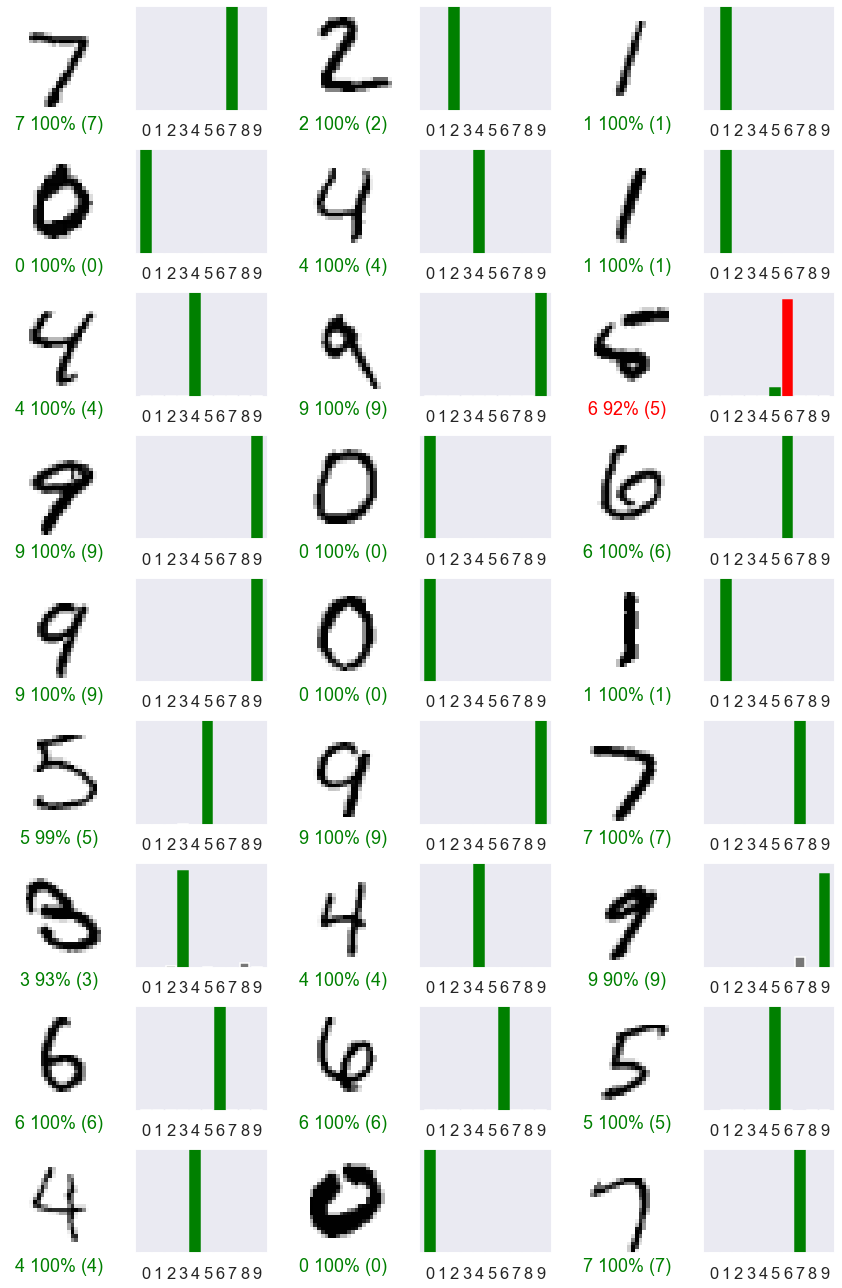

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 9
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()